<a href="https://colab.research.google.com/github/francji1/01NAEX/blob/main/projects/01NAEX_HW01_Prochazka_Rosenkrancova_Belohlavek_Adamek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01NAEX Project 01 - Pendulum study

---

Prochazka_Rosenkrancova_Belohlavek_Adamek


In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd

Our task was to evaluate whether the length, the elevation angle and the weight of a pendulum affect the period time. In total, we have conducted 27 individual experiments, using combinations of three different weights, lengths and angles.

In [2]:
a = 3
b = 3
D = 0.2
sigma = 0.5
Fi = 0.8

n = Fi**2 / (b*D**2) * 2 * a * sigma**2
print(n)

8.0


We should have performed 8 measurements for each setting, however due to time constraints, we resorted to only 3 (which are likely correlated)

| Parameter | Values |
|---|---|
| Weight[g] | 219, 77, 20 |
| Length[cm] | 107, 76, 54 |
| Angle[degrees] | 6.55, 11.29, 15.84 |

In theory, the period $T$ is independent of the weight and angle $\theta$ :$$T \simeq 2\pi \sqrt{\frac{L}{g}}, \qquad for \quad |\theta| < 10^{o}.$$ Our task was to verify whether this relation really holds.

In the raw data, we (Tomas, Lydie, Filip) measured the time of 6 swings to average out errors. The measurement was started after one completed swing. Raw data is true to the performed run order.

In [3]:
data_raw = {"weight_g": [219, 219, 219, 219, 219, 219, 219, 219, 219, 20, 20, 20, 20, 20, 20, 20, 20, 20, 77, 77, 77, 77, 77, 77, 77, 77, 77],
        "length_cm": [76, 76, 76, 54, 54, 54, 107, 107, 107, 107, 107, 107, 76, 76, 76, 54, 54, 54, 54, 54, 54, 76, 76, 76, 107, 107, 107],
        "angle_deg": [6.55, 11.29, 15.84, 6.55, 11.29, 15.84, 6.55, 11.29, 15.84, 6.55, 11.29, 15.84, 6.55, 11.29, 15.84,6.55, 11.29, 15.84, 6.55, 11.29, 15.84, 6.55, 11.29, 15.84, 6.55, 11.29, 15.84],
        "times_TLF_sec": [[10.66, 10.31, 10.37], [10.63, 10.63, 10.6], [10.61, 10.6, 10.27], [9.23, 9.12, 9.02], [9.24, 9.15, 9.08], [9.2, 9.18, 9.14], [12.49, 12.36, 12.35], [12.4, 12.45, 12.4], [12.55, 12.62, 12.66], [12.38, 12.41, 12.4], [12.31, 12.4, 12.33], [12.47, 12.43, 12.32], [10.47, 10.51, 10.47], [10.45, 10.38, 10.34], [10.43, 10.55, 10.36], [8.97, 8.93, 9.02], [8.94, 8.96, 9.05], [9.06, 8.98, 9.07], [9.16, 9.16, 9.22], [9.2, 9.11, 9.37], [9.15, 9.06, 9.25], [10.66, 10.41, 10.57], [10.55, 10.43, 10.51], [10.61, 10.58, 10.50], [12.41, 12.24, 12.47], [12.52, 12.4, 12.51], [12.42, 12.28, 12.47]]}
df_raw = pd.DataFrame(data_raw)

print(df_raw)

    weight_g  length_cm  angle_deg          times_TLF_sec
0        219         76       6.55  [10.66, 10.31, 10.37]
1        219         76      11.29   [10.63, 10.63, 10.6]
2        219         76      15.84   [10.61, 10.6, 10.27]
3        219         54       6.55     [9.23, 9.12, 9.02]
4        219         54      11.29     [9.24, 9.15, 9.08]
5        219         54      15.84      [9.2, 9.18, 9.14]
6        219        107       6.55  [12.49, 12.36, 12.35]
7        219        107      11.29    [12.4, 12.45, 12.4]
8        219        107      15.84  [12.55, 12.62, 12.66]
9         20        107       6.55   [12.38, 12.41, 12.4]
10        20        107      11.29   [12.31, 12.4, 12.33]
11        20        107      15.84  [12.47, 12.43, 12.32]
12        20         76       6.55  [10.47, 10.51, 10.47]
13        20         76      11.29  [10.45, 10.38, 10.34]
14        20         76      15.84  [10.43, 10.55, 10.36]
15        20         54       6.55     [8.97, 8.93, 9.02]
16        20  

We transform the raw data into standard units of measurement. Also divide the times by 6 (time of one swing).

In [4]:
df_individual = pd.DataFrame()
weight_kg_list = []
length_m_list = []
angle_deg_list = []
time_sec_list = []
person_list = []

for index, row in df_raw.iterrows():
    times = row['times_TLF_sec']
    weight = row['weight_g'] / 1000
    length = row['length_cm'] / 100
    angle = row['angle_deg']

    weight_kg_list.extend([weight] * 3)
    length_m_list.extend([length] * 3)
    angle_deg_list.extend([angle] * 3)
    time_sec_list.extend([times[0]/6, times[1]/6, times[2]/6]) # Divide each measurement by 6
    person_list.extend(['T', 'L', 'F'])

df_individual['weight_kg'] = weight_kg_list
df_individual['length_m'] = length_m_list
df_individual['angle_deg'] = angle_deg_list
df_individual['time_sec'] = time_sec_list
df_individual['person'] = person_list

print(df_individual)

    weight_kg  length_m  angle_deg  time_sec person
0       0.219      0.76       6.55  1.776667      T
1       0.219      0.76       6.55  1.718333      L
2       0.219      0.76       6.55  1.728333      F
3       0.219      0.76      11.29  1.771667      T
4       0.219      0.76      11.29  1.771667      L
..        ...       ...        ...       ...    ...
76      0.077      1.07      11.29  2.066667      L
77      0.077      1.07      11.29  2.085000      F
78      0.077      1.07      15.84  2.070000      T
79      0.077      1.07      15.84  2.046667      L
80      0.077      1.07      15.84  2.078333      F

[81 rows x 5 columns]


In [5]:
g = 9.81
time_l_max_theoretical = 2*np.pi*np.sqrt(1.07/9.81)
time_l_mid_theoretical = 2*np.pi*np.sqrt(0.76/9.81)
time_l_min_theoretical = 2*np.pi*np.sqrt(0.54/9.81)

print(time_l_max_theoretical, time_l_mid_theoretical, time_l_min_theoretical)

2.0750915098808185 1.7488483870443574 1.4741519273219483


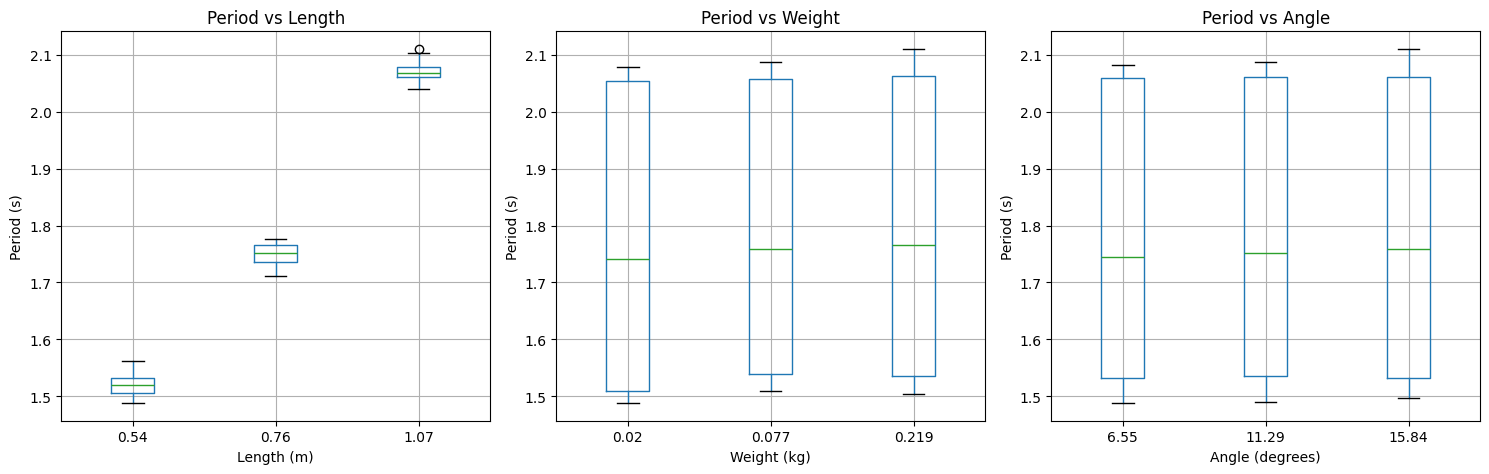

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))


df_individual.boxplot(column='time_sec', by='length_m', ax=axes[0])
axes[0].set_title('Period vs Length')
axes[0].set_xlabel('Length (m)')
axes[0].set_ylabel('Period (s)')

df_individual.boxplot(column='time_sec', by='weight_kg', ax=axes[1])
axes[1].set_title('Period vs Weight')
axes[1].set_xlabel('Weight (kg)')
axes[1].set_ylabel('Period (s)')


df_individual.boxplot(column='time_sec', by='angle_deg', ax=axes[2])
axes[2].set_title('Period vs Angle')
axes[2].set_xlabel('Angle (degrees)')
axes[2].set_ylabel('Period (s)')

plt.suptitle('')
plt.tight_layout()
plt.show()

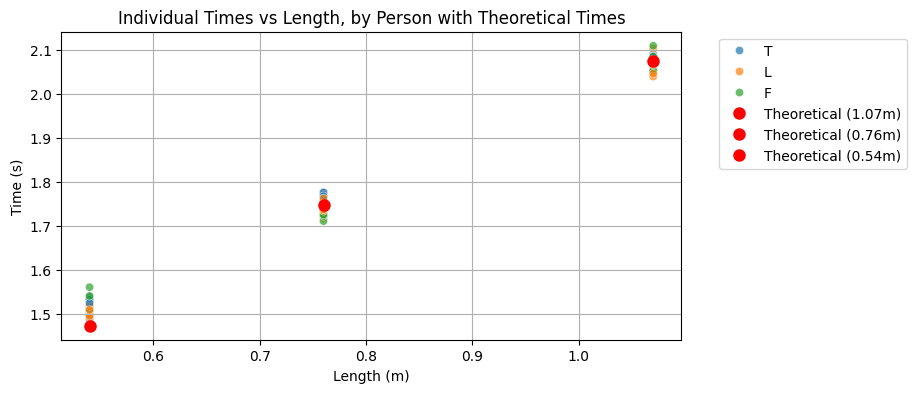

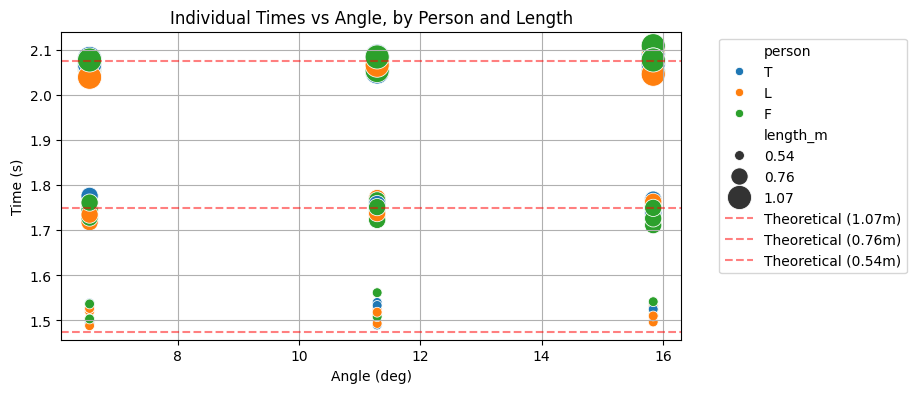

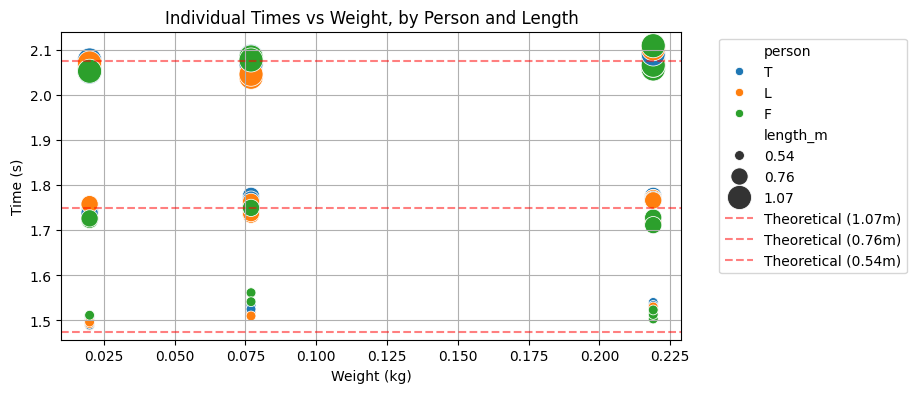

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting individual times vs length, colored by person
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df_individual, x='length_m', y='time_sec', hue='person', alpha=0.7)

# Plotting theoretical times as dots for each length
plt.plot(1.07, time_l_max_theoretical, 'ro', markersize=8, label='Theoretical (1.07m)')
plt.plot(0.76, time_l_mid_theoretical, 'ro', markersize=8, label='Theoretical (0.76m)')
plt.plot(0.54, time_l_min_theoretical, 'ro', markersize=8, label='Theoretical (0.54m)')


plt.xlabel("Length (m)")
plt.ylabel("Time (s)")
plt.title("Individual Times vs Length, by Person with Theoretical Times")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
# Plotting individual times vs angle, colored by person and sized by length
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df_individual, x='angle_deg', y='time_sec', hue='person', size='length_m', sizes=(50, 300))

# Add theoretical time annotations for each length (since theoretical time is length dependent)
plt.axhline(y=time_l_max_theoretical, color='red', linestyle='--', alpha=0.5, label='Theoretical (1.07m)')
plt.axhline(y=time_l_mid_theoretical, color='red', linestyle='--', alpha=0.5, label='Theoretical (0.76m)')
plt.axhline(y=time_l_min_theoretical, color='red', linestyle='--', alpha=0.5, label='Theoretical (0.54m)')


plt.xlabel("Angle (deg)")
plt.ylabel("Time (s)")
plt.title("Individual Times vs Angle, by Person and Length")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Plotting individual times vs weight, colored by person and sized by length
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df_individual, x='weight_kg', y='time_sec', hue='person', size='length_m', sizes=(50, 300))

# Add theoretical time annotations for each length (since theoretical time is length dependent)
plt.axhline(y=time_l_max_theoretical, color='red', linestyle='--', alpha=0.5, label='Theoretical (1.07m)')
plt.axhline(y=time_l_mid_theoretical, color='red', linestyle='--', alpha=0.5, label='Theoretical (0.76m)')
plt.axhline(y=time_l_min_theoretical, color='red', linestyle='--', alpha=0.5, label='Theoretical (0.54m)')


plt.xlabel("Weight (kg)")
plt.ylabel("Time (s)")
plt.title("Individual Times vs Weight, by Person and Length")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform ANOVA for all persons
model = ols('time_sec ~ C(weight_kg) + C(length_m) + C(angle_deg) + C(person)', data=df_individual).fit()
anova_table_all = sm.stats.anova_lm(model, typ=2)
print(model.summary())

print("ANOVA results for all persons:")
print(anova_table_all)

                            OLS Regression Results                            
Dep. Variable:               time_sec   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     2205.
Date:                Mon, 20 Oct 2025   Prob (F-statistic):           7.64e-83
Time:                        15:34:09   Log-Likelihood:                 228.13
No. Observations:                  81   AIC:                            -438.3
Df Residuals:                      72   BIC:                            -416.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.50

At $\alpha = 0.05$ we reject $H_0$ that the effect is not significant when $p<0.05$. Significant effects: Length and Weight. We compute model with interactions between length and angle, because angles were calculated using chosen lenghts.

Since the relationship between length and period is non-linear, we tried to estimate a model with square root transformation of length.

In [9]:
df_individual['l_sqrt'] = np.sqrt(df_individual['length_m'])
model_sqrt= ols('time_sec ~ C(person) + l_sqrt + C(angle_deg) + C(weight_kg)', data=df_individual).fit()
print(model_sqrt.summary())

                            OLS Regression Results                            
Dep. Variable:               time_sec   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1726.
Date:                Mon, 20 Oct 2025   Prob (F-statistic):           2.20e-78
Time:                        15:34:10   Log-Likelihood:                 212.33
No. Observations:                  81   AIC:                            -408.7
Df Residuals:                      73   BIC:                            -389.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.13

After comparison of the two examined models by AIC, BIC, R^2, we conclude that the model with length as a categorical variable is better. We continue with this model by including interaction between length and angle, since the angles were calculated from the pre-chosen lengths. If this interaction were significant, it could mean that we have made a mistake in the setup iteself.

In [10]:
model_lw_interaction = ols('time_sec ~ C(person) + C(length_m)*C(angle_deg) + C(weight_kg)', data=df_individual).fit()
anova_table_lw = sm.stats.anova_lm(model_lw_interaction, typ=2)

print("ANOVA with interaction")
print(anova_table_lw)



ANOVA with interaction
                            sum_sq    df            F        PR(>F)
C(person)                 0.001260   2.0     2.586754  8.265537e-02
C(length_m)               4.150356   2.0  8521.432083  2.366230e-82
C(angle_deg)              0.000569   2.0     1.167271  3.173718e-01
C(weight_kg)              0.005694   2.0    11.690880  4.325930e-05
C(length_m):C(angle_deg)  0.000412   4.0     0.423310  7.912862e-01
Residual                  0.016560  68.0          NaN           NaN


interaction is not significant. Let's go to Tukey HSD for weight

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  0.02  0.077   0.0175 0.9584 -0.1329 0.1678  False
  0.02  0.219   0.0181 0.9555 -0.1323 0.1684  False
 0.077  0.219   0.0006 0.9999 -0.1497  0.151  False
---------------------------------------------------


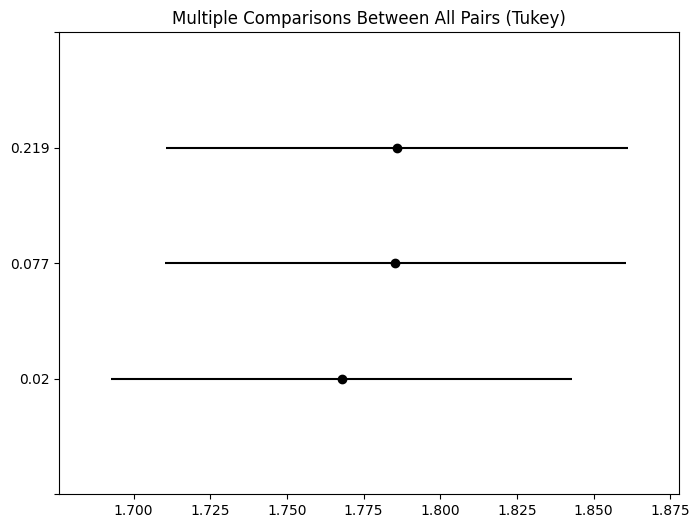

In [11]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


tukey = pairwise_tukeyhsd(
    endog=df_individual['time_sec'],
    groups=df_individual['weight_kg'],
    alpha=0.05
)

print(tukey)
fig = tukey.plot_simultaneous(figsize=(8, 6))
plt.show()


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
  0.54   0.76   0.2311   0.0 0.2196 0.2426   True
  0.54   1.07    0.552   0.0 0.5405 0.5636   True
  0.76   1.07   0.3209   0.0 0.3094 0.3324   True
-------------------------------------------------


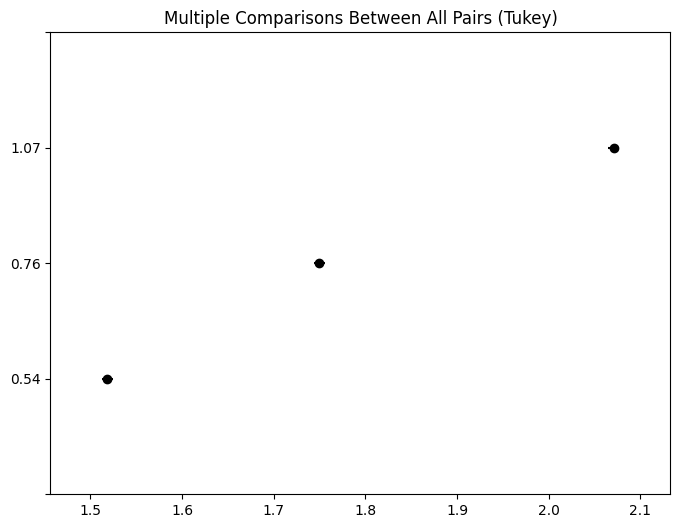

In [12]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


tukey = pairwise_tukeyhsd(
    endog=df_individual['time_sec'],
    groups=df_individual['length_m'],
    alpha=0.05
)

print(tukey)
fig = tukey.plot_simultaneous(figsize=(8, 6))
plt.show()



Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  6.55  11.29   0.0035 0.9983 -0.1469  0.154  False
  6.55  15.84   0.0065 0.9942  -0.144 0.1569  False
 11.29  15.84    0.003 0.9988 -0.1475 0.1534  False
---------------------------------------------------


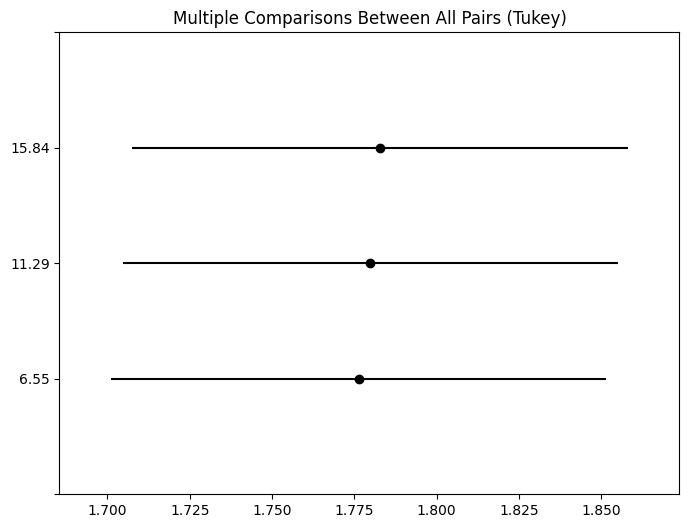

In [13]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


tukey = pairwise_tukeyhsd(
    endog=df_individual['time_sec'],
    groups=df_individual['angle_deg'],
    alpha=0.05
)

print(tukey)
fig = tukey.plot_simultaneous(figsize=(8, 6))
plt.show()


No pair of weights nor angles cathegories differ significantly, however, as expected, there is a significant difference in the length.

Now we test for normality with visual plots (QQ, residuals x data) and formal tests

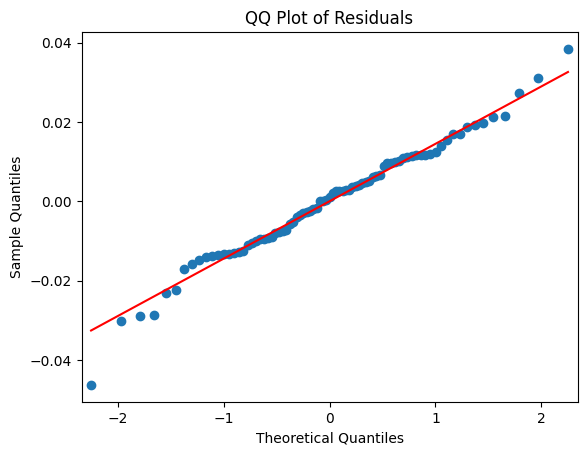

Shapiro-Wilk p-value: 0.655
Breusch-Pagan p:     0.293
Durbin-Watson stat:  1.867


In [14]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.diagnostic import het_breuschpagan

residuals = model.resid

fig = sm.qqplot(residuals, line='s')
plt.title("QQ Plot of Residuals")
plt.show()

s_w, s_p = stats.shapiro(residuals)

bp_stat, bp_p, _, _ = het_breuschpagan(residuals, model.model.exog)
dw_stat = sm.stats.durbin_watson(residuals)

print(f"Shapiro-Wilk p-value: {s_p:.3f}")
print(f"Breusch-Pagan p:     {bp_p:.3f}")
print(f"Durbin-Watson stat:  {dw_stat:.3f}")

Shapiro-Wilk: failed to reject normality,

Breusch-Pagan: failed to reject homoskedacity,

Durbin-Watson: close to 2 -> no significant autocorrelation

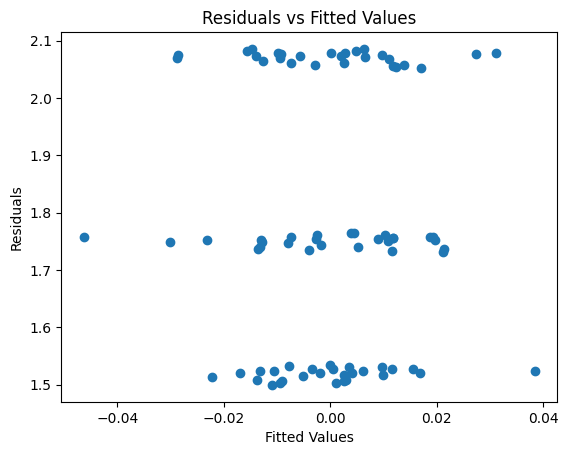

In [15]:
plt.scatter(residuals, model.fittedvalues)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

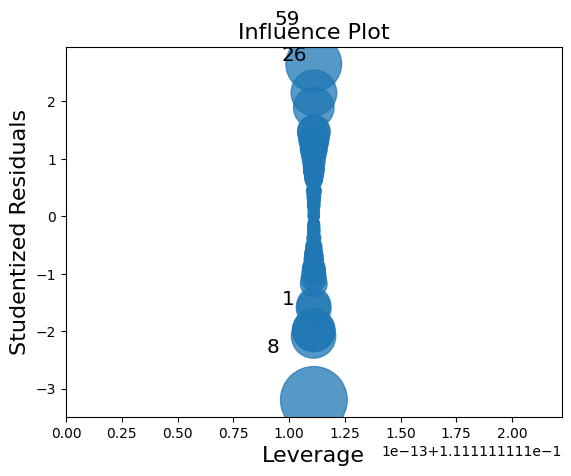

In [16]:
from statsmodels.stats.outliers_influence import OLSInfluence

influence = OLSInfluence(model)
fig = influence.plot_influence(figsize=(8, 6))
plt.show()

Power test

    Sample Size     Power
0             3  0.139105
1             4  0.193326
2             5  0.248958
3             6  0.304883
4             7  0.360176
5             8  0.414083
6             9  0.466011
7            10  0.515509
8            11  0.562258
9            12  0.606050
10           13  0.646772
11           14  0.684389
12           15  0.718928
13           16  0.750468
14           17  0.779124
15           18  0.805038
16           19  0.828371
17           20  0.849295
18           21  0.867990
19           22  0.884634
20           23  0.899403
21           24  0.912468
22           25  0.923991
23           26  0.934126
24           27  0.943017
25           28  0.950796
26           29  0.957588
27           30  0.963503
28           31  0.968644
29           32  0.973103
30           33  0.976963
31           34  0.980297
32           35  0.983173
33           36  0.985648
34           37  0.987776
35           38  0.989601
36           39  0.991165


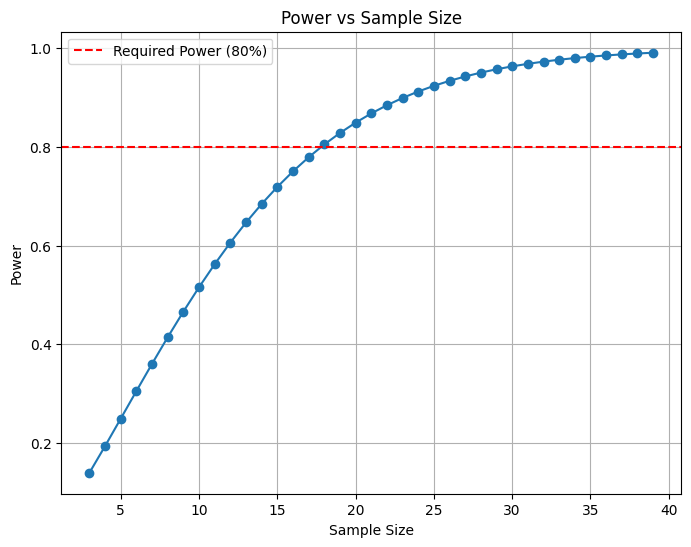

In [17]:
from statsmodels.stats.power import FTestAnovaPower

power_analysis = FTestAnovaPower()
alpha = 0.05
sigma = df_individual['time_sec'].std()
max_dif = 0.2 # average human reaction time

cohen_f = (max_dif / 2) / sigma
sample_sizes = np.arange(3, 40)
power_values = [power_analysis.power(effect_size=cohen_f, nobs=n*3, alpha=alpha, k_groups=3) for n in sample_sizes]

power_df = pd.DataFrame({'Sample Size': sample_sizes, 'Power': power_values})
print(power_df)
fig, ax = plt.subplots(figsize=(8, 6))
plt.grid(True)
ax.plot(power_df['Sample Size'], power_df['Power'], marker='o')
ax.set_xlabel('Sample Size')
ax.set_ylabel('Power')
ax.set_title('Power vs Sample Size')
ax.axhline(y=0.8, color='r', linestyle='--', label='Required Power (80%)')
ax.legend()
plt.show()


The largest observed difference in our data was 0.3s, while the average human reaction time is about 0.2s, which was taken as max_dif in our calculations. To achieve the desired 80% power of the test, we should have performed about 18 measurements per group.




In [18]:
a = 3
b = 3

D_L = 0.1
Fi_L = 0.8
n_L = 2*(a-1)*sigma**2 / (b * D_L**2) * Fi_L**2

D_A = 0.23
Fi_A = 0.9
n_A = 2*(b-1)*sigma**2 / (a * D_A**2) * Fi_A**2

print(n_L, n_A)

4.453173991769545 1.0654155639571514


We only needed one measurement per group for different angles, which we had and 4 separate measurements per group for different lenghts.

The person is not an influential factor, that is why we estimate a model, where we use the median measured time.

In [19]:
df_median_time = df_individual.groupby(['weight_kg', 'length_m', 'angle_deg'])['time_sec'].median().reset_index()
print(df_median_time)

    weight_kg  length_m  angle_deg  time_sec
0       0.020      0.54       6.55  1.495000
1       0.020      0.54      11.29  1.493333
2       0.020      0.54      15.84  1.510000
3       0.020      0.76       6.55  1.745000
4       0.020      0.76      11.29  1.730000
5       0.020      0.76      15.84  1.738333
6       0.020      1.07       6.55  2.066667
7       0.020      1.07      11.29  2.055000
8       0.020      1.07      15.84  2.071667
9       0.077      0.54       6.55  1.526667
10      0.077      0.54      11.29  1.533333
11      0.077      0.54      15.84  1.525000
12      0.077      0.76       6.55  1.761667
13      0.077      0.76      11.29  1.751667
14      0.077      0.76      15.84  1.763333
15      0.077      1.07       6.55  2.068333
16      0.077      1.07      11.29  2.085000
17      0.077      1.07      15.84  2.070000
18      0.219      0.54       6.55  1.520000
19      0.219      0.54      11.29  1.525000
20      0.219      0.54      15.84  1.530000
21      0.

This model reflects the theory quite well as the fitted with square root of the length and numerical values instead of categorical has weight and angle as statistically insignificant.

In [20]:
model_median = ols('time_sec ~ C(weight_kg)*C(angle_deg) + C(length_m)', data=df_median_time).fit()
print(model_median.summary())

                            OLS Regression Results                            
Dep. Variable:               time_sec   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1479.
Date:                Mon, 20 Oct 2025   Prob (F-statistic):           9.16e-22
Time:                        15:34:16   Log-Likelihood:                 93.855
No. Observations:                  27   AIC:                            -165.7
Df Residuals:                      16   BIC:                            -151.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

This model with 2nd degree interaction between angle and weight shows that compared to the intercept: weight = 0.02kg, length = 0.54m, angle = 6.55deg., both weight and angle are not significant. Apart from the largest weight: THE HOOK. This could be explained by the hooks shape producing more drag, oscilations in the string and even moving the blackboard itself due to its weight.

In [21]:
unique_weights = df_median_time['weight_kg'].unique()

for weight in unique_weights:
    print(f"\nModeling for weight: {weight} kg")

    df_median_filtered_weight = df_median_time[df_median_time['weight_kg'] == weight].copy()

    model_median_weight = ols('time_sec ~ C(length_m) + C(angle_deg)', data=df_median_filtered_weight).fit()
    print(model_median_weight.summary())


Modeling for weight: 0.02 kg
                            OLS Regression Results                            
Dep. Variable:               time_sec   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3836.
Date:                Mon, 20 Oct 2025   Prob (F-statistic):           2.04e-07
Time:                        15:34:16   Log-Likelihood:                 37.526
No. Observations:                   9   AIC:                            -65.05
Df Residuals:                       4   BIC:                            -64.07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


This shows that by blocking the weight the theoretical relationship holds and angles are not a significant predictor. The only case, where an angle is close to being significat is at 15.84deg. at 219g. This can be expalained by the same logic as above.

We chose the model with continuous variables and square root of L as the best one. We will compute g based on estimated coefficient in this model and the given relationship.

In [22]:
df_median_time["L_sqrt"] = df_median_time["length_m"].apply(np.sqrt)
model_median_time = ols('time_sec ~  L_sqrt- 1', data=df_median_time).fit()
print(model_median_time.summary())

                                 OLS Regression Results                                
Dep. Variable:               time_sec   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.181e+05
Date:                Mon, 20 Oct 2025   Prob (F-statistic):                    4.43e-49
Time:                        15:34:16   Log-Likelihood:                          59.584
No. Observations:                  27   AIC:                                     -117.2
Df Residuals:                      26   BIC:                                     -115.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [23]:
l_sq_coeff = 2.0188

g = np.power((2*np.pi) / l_sq_coeff, 2)
print(g)

9.686639663926828


# Conclusion

If we create a model including all the categories (person, angle, weight, length) then length and weight are significant. Based on this we decided to further explore why the weight is significat, even though according to the theoretical model, it should not be. We tried implementing a model with interactions and blocking with respect to the weights.

Based on the fitted models with blocked weights, we concluded that the largest weight (219g) influences the measurement the most. This might be because of the shape of the hook as well as its forces acting on the blackboard, which is not firmly attached to the wall.

Overall, we have cocluded that the model with continuous varibales and $\sqrt{L}$ is the best one and it gives $g = 9.687
$.